<h1 style='font-size:40px'>Unsupervised Learning</h1>

<h2 style='font-size:30px'>Introduction</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Os métodos de Machine Learning não Supervisionado podem ser divididos em dois tipos, os de  Clustering e Transformação.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'>Clustering</h3>
<center>
    <img src='clustering1.png'>
</center>
<div> 
    <ul style='font-size:20px'>
        <li>
            Como a imagem revela, o algoritmo de clustering foi capaz de segmentar os usuários de um site de vendas em duas categorias: os especialistas focados e os comuns.
        </li>
        <li>
            Isso foi obtido apenas com a análise do número de recursos de filtragem utilizados e o número de páginas acessadas por cada um dos indivíduos.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Transformação</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Transformam os dados recebidos.
        </li>
    </ul>
</div>
<center>
    <img src='transformation1.png'>
</center>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Como a imagem revela, os dados sobre concentração de glicose no sangue de diabéticos foram transformados em um gráfico de estimativa de densidade.
        </li>
    </ul>
</div>
<center>
    <img src='transformation2.png'>
</center>
<div> 
    <ul style='font-size:20px'> 
        <li>
            O gráfico dos pacientes diabéticos poderá ser comparado com um a respeito de pacientes não-diabéticos.
        </li>
    </ul>
</div>

<div>
    <hr>
    <h2 style='font-size:30px'> Dimensionality Reduction and Manifold Learning</h2>
</div>

Entender melhor o PCA

<div>
    <hr>
<h2 style='font-size:30px'>Clustering</h2>
</div>

<h3 style='font-size:30px;font-style:italic'>K-Means</h3>
<div> 
    <ul style='font-size:20px'>
        <li>
            O K-Means é um algoritmo de clusterização capaz de agrupar as instâncias do dataset de acordo com similaridades em seus dados.
        </li>
        <li>
            Se quisermos criar dois agrupamentos, o scikit-learn criará dois pontos aleatórios pelo plano cartesiano; eles serão o núcleo dos seus respectivos grupos. Após isso, cada instância será designada ao cluster mais próximo. Após esse primeiro processo, os centros dos clusters receberão um novo valor, que será a média das coordenadas dos pontos pertencentes ao grupo. Após essa alteração, as instâncias sofrerão uma nova designação com base em suas distâncias aos novos núcleos. Esse processo se repetirá até que os centros passem a ter um valor estável.
        </li>
        <li>
            Observe que alguns algoritmos não serão capazes de prever o grupo de novas instâncias.
        </li>
    </ul>
</div>
<strong style='font-size:20px'>Obs: O K-Means é um algoritmo muito sensível à escala das features. Dessa forma, busque normalizá-las!</strong>

In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Usando o MinMaxScaler a fim de facilitar o trabalho do KMeans.
scaler = MinMaxScaler()
fruits = pd.read_table('fruit_data_with_colors (1).txt')

X = fruits[['mass','width','height','color_score']]
X_transform = scaler.fit_transform(X)
y = fruits['fruit_label'] -1

kmeans = KMeans(n_clusters=len(y.unique()), random_state=0).fit(X_transform)

<h4 style='font-size:25px;font-style:italic;text-decoration:underline'> Limitações do K-Means</h4>
<div>
    <ul style='font-size:20px'>
        <li>
            Pode ser ineficaz com grupos muito irregulares ou complexos.
        </li>
        <li>
            Lida apenas com dados numéricos (existem variações do K-Means que podem utilizar informações categóricas).
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Agglomerative Clustering</h3>
<div> 
    <ul style= 'font-size:20px'>
        <li>
            O Agglomerative Clustering considera cada instância do dataset como um grupo individualizado. Dessa forma, o seu objetivo é fundir os clusters de acordo com uma regra de similaridade até que um número definido de grupos reste no plano cartesiano.
        </li>
    </ul>
</div>
<center>
    <h1>Agglomerative Clustering com três grupos finais</h1>
    <img src='agg_cluster1.png'>
</center>

<h4 style='font-size:25px;font-style:italic;text-decoration:underline'>Regras de agrupamento</h4>
<div>
    <ul style= 'font-size:20px'>
        <li>
            <em>Ward's Method</em>: Cria um agrupamento que provoque a menor alteração das distâncias entre as instâncias e o seus núcleos.
        </li>
        <li>
            <em>Average Linkage</em>: Menor distância média entre as instâncias dos dois grupos a serem fundidos
        </li>
        <li>
            <em>Max Linkage</em>: Cria o agrupamento a partir dos clusters com menor distância máxima.
        </li>
    </ul>
</div>
<center>
    <img src='agg_cluster2.png'>
</center>
<strong style='font-size:20px'>Obs: Normalmente, utilizaremos o método Ward. No entanto, caso acreditemos que os clusters sejam discrepantes entre si (em termos de tamanho, por exemplo), é recomendável usar o Average ou Max Linkage.</strong>

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X,y = make_blobs(random_state=10)

# 'n_clusters' define o número final de cluster que queremos ter.
agg = AgglomerativeClustering(n_clusters=3).fit_predict(X)
agg

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2])

<h4 style='font-size:25px;font-style:italic;text-decoration:underline'> Dendograma</h4>
<div>
    <ul style='font-size:20px'> 
        <li>
            Os dendogramas são gráficos capazes de representar a fusão entre os diferentes clusters e a respectiva distância entre os centros dos grupos que formaram o novo agrupamento.
        </li>
    </ul>
</div>
<center> 
    <img src='agg_cluster3.png'>
</center>

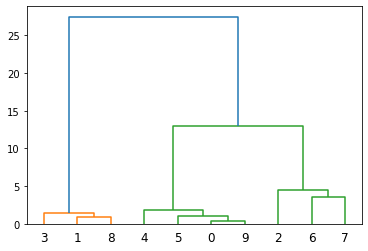

In [55]:
# Observe na imagem que ter apenas dois clusters pode não ser uma boa estratégia de generalização, dado que o ponto A se encontra 
# muito distante de C, F e D.

# Agora, faremos um dendograma com o módulo hierarchy, de scipy.cluster.
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=10, n_samples=10)

dendrogram(ward(X));

<h3 style='font-size:30px;font-style:italic'> DBSCAN</h3>
<div> 
    <ul style='font-size:20px'>
        <li>
            O DBSCAN é capaz de, sozinho, identificar agrupamentos sem que nós precisemos definir o número de grupos que queremos formar.
        </li>
        <li>
            Isso é feito a partir dos argumentos <em>min_samples</em> e <em>eps</em>, que definem o número mínimo de pontos que uma aglomeração no plano cartesiano deverá ter para ser considerada um grupo e a distância máxima que as instâncias deverão estar uma das outras para serem designadas aos grupos.
        </li>
        <li>
            Com esses argumentos em mãos, o algoritmo também pode identificar pontos de exceção pelo dataset (como aqueles com a cor vermelha na imagem).
        </li>
    </ul>
</div>
<center> 
    <img src='dbscan1.png'>
</center>

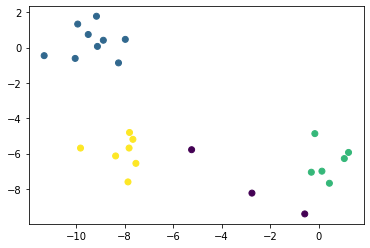

In [71]:
from matplotlib.pyplot import scatter
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X,y = make_blobs(random_state=9, n_samples=25)
dbscan = DBSCAN(eps=2, min_samples=2)
cls = dbscan.fit_predict(X)

# A partir da imagem, é possível perceber os diferentes agrupamentos feitos. Os pontos roxos sinalizam
# instâncias não pertencentes a nenhuma categoria.
scatter(X[:,0], X[:,1], c=cls+1)

<h3 style='font-size:30px;font-style:italic'>Avaliação de modelos de unsupervised-learning</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Por seus datasets não possuírem um valor-alvo, avaliar modelos de Machine Learning não-supervisonado pode ser algo complicado. No entanto, uma abordagem proposta é, se o contexto permitir, avaliar o ganho de performance de um algoritmo supervisionado ao se adicionar o output de um modelo não-supervisionado como feature.
        </li>
    </ul> 
</div>

Continuar a aula Clustering (7:20)

In [57]:
! mv /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-04-20\ at\ 10.38.20.png ./dbscan1.png